In [1]:
import numpy as np
x = np.random.rand(10, 1, 28,28)
x.shape

(10, 1, 28, 28)

In [2]:
x[0].shape

(1, 28, 28)

In [11]:
x[0,0,27]

array([0.71323349, 0.44859582, 0.68274165, 0.98112736, 0.79137273,
       0.61624256, 0.68689859, 0.8564978 , 0.15753153, 0.15847651,
       0.05479156, 0.8583094 , 0.74025757, 0.85686351, 0.9794553 ,
       0.19544814, 0.36476507, 0.50508098, 0.43548612, 0.99990832,
       0.06830075, 0.22712569, 0.07435043, 0.05741454, 0.86050933,
       0.92858235, 0.46154498, 0.82245997])

### 7.4.3 Convolutionレイヤの実装

In [14]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

(9, 75)


In [16]:
x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(90, 75)


In [17]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out

### 7.4.4 Poolingレイヤの実装

In [18]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = (1 + (H - self.pool_h) / self.stride)
        out_w = (1 + (W - self.pool_w) / self.stride)
        
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        out = np.max(col, axis=1)
        
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

In [22]:
x = np.random.rand(1, 3, 4, 4)
pool_h = 2
pool_w = 2
stride = 2
pad = 0
col = im2col(x, pool_h, pool_w, stride, pad)
col

array([[0.73899222, 0.81613105, 0.45130817, 0.92044752, 0.69388929,
        0.95951403, 0.21447958, 0.32713815, 0.82962759, 0.35019084,
        0.04249587, 0.68509399],
       [0.78236654, 0.98071041, 0.56403835, 0.45274309, 0.93632008,
        0.34028279, 0.75835548, 0.78743992, 0.57547079, 0.08493042,
        0.35641655, 0.35810869],
       [0.38434388, 0.67934982, 0.18458729, 0.21494572, 0.22617105,
        0.73125912, 0.72167868, 0.44691215, 0.68411641, 0.4666562 ,
        0.54993564, 0.2122609 ],
       [0.87494947, 0.49365147, 0.86435256, 0.00372315, 0.40396061,
        0.78875842, 0.78195831, 0.54301173, 0.36895523, 0.33593468,
        0.82606934, 0.91612151]])

In [23]:
col = col.reshape(-1, pool_h*pool_w)
col

array([[0.73899222, 0.81613105, 0.45130817, 0.92044752],
       [0.69388929, 0.95951403, 0.21447958, 0.32713815],
       [0.82962759, 0.35019084, 0.04249587, 0.68509399],
       [0.78236654, 0.98071041, 0.56403835, 0.45274309],
       [0.93632008, 0.34028279, 0.75835548, 0.78743992],
       [0.57547079, 0.08493042, 0.35641655, 0.35810869],
       [0.38434388, 0.67934982, 0.18458729, 0.21494572],
       [0.22617105, 0.73125912, 0.72167868, 0.44691215],
       [0.68411641, 0.4666562 , 0.54993564, 0.2122609 ],
       [0.87494947, 0.49365147, 0.86435256, 0.00372315],
       [0.40396061, 0.78875842, 0.78195831, 0.54301173],
       [0.36895523, 0.33593468, 0.82606934, 0.91612151]])

In [24]:
col.shape

(12, 4)

In [25]:
out = np.max(col, axis=1)
out

array([0.92044752, 0.95951403, 0.82962759, 0.98071041, 0.93632008,
       0.57547079, 0.67934982, 0.73125912, 0.68411641, 0.87494947,
       0.78875842, 0.91612151])

In [26]:
out = out.reshape(1, 2, 2, 3).transpose(0, 3, 1, 2)

In [27]:
out

array([[[[0.92044752, 0.98071041],
         [0.67934982, 0.87494947]],

        [[0.95951403, 0.93632008],
         [0.73125912, 0.78875842]],

        [[0.82962759, 0.57547079],
         [0.68411641, 0.91612151]]]])

In [1]:
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28),
                conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size +2*filter_pad) / filter_stride +1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0],
                                                             filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size,
                                                             hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderdDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                          self.params['b1'],
                                          conv_param['stride'],
                                          conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                       self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                       self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        #設定
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads

train loss:2.299652017783761
=== epoch:1, train acc:0.278, test acc:0.201 ===
train loss:2.2975677996599244
train loss:2.295306245829516
train loss:2.287403245939413
train loss:2.2787263426296045
train loss:2.274438284637766
train loss:2.254692811268249
train loss:2.2286021954191004
train loss:2.226443325058204
train loss:2.194141654238878
train loss:2.157857859380765
train loss:2.1345440216076157
train loss:2.0410555404964854
train loss:2.0497281785383223
train loss:1.946566886743018
train loss:1.9304966260109786
train loss:1.8125608606747436
train loss:1.8220564033452598
train loss:1.6924488221058014
train loss:1.5606425390807195
train loss:1.5170029174902075
train loss:1.4654381919911352
train loss:1.3688084258429112
train loss:1.3124760389032621
train loss:1.222464216863028
train loss:1.1421280974321193
train loss:1.0938497997560557
train loss:1.0039499074637037
train loss:1.0892717214282963
train loss:0.8167574431684633
train loss:0.830296287725483
train loss:0.8320397971164065
tr

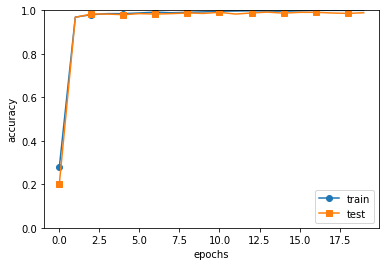

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()